In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
np.random.seed(123)
X = np.random.rand(100, 1) - 0.5
y = -4 * X[:, 0]**2 + 0.05*np.random.randn(100)        # y = -4x2 + Gaussian noise

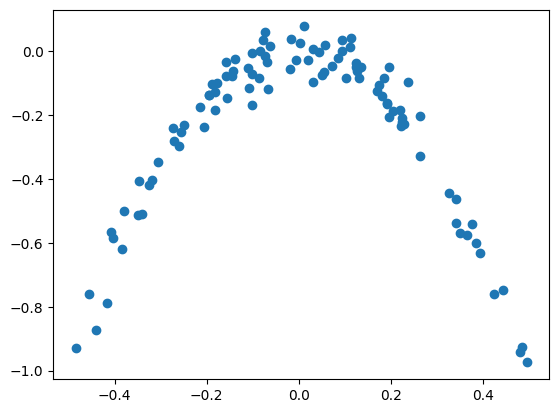

In [19]:
plt.scatter(X, y)

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=2, random_state=123)
tree1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=123)

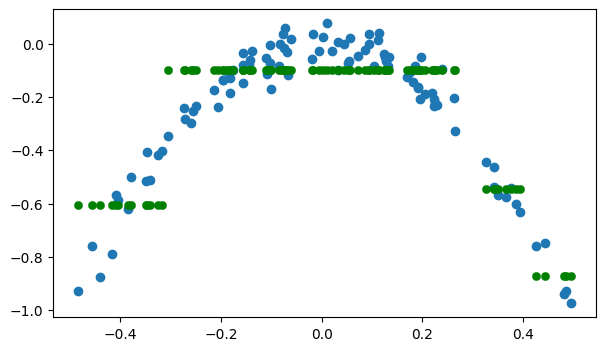

In [21]:
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(X, y)
ax.scatter(X, tree1.predict(X), color="green", lw=0.25);

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree2 = DecisionTreeRegressor(max_depth=8, random_state=123)
tree2.fit(X, y)

DecisionTreeRegressor(max_depth=8, random_state=123)

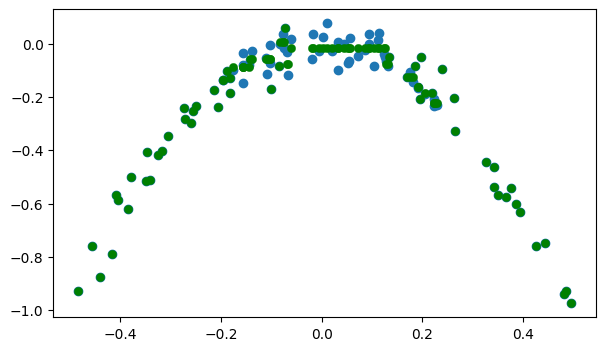

In [23]:
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(X, y)
ax.scatter(X, tree2.predict(X), color="green", lw=0.25);

## It overfits the data

# Train a second decision tree on the residual errors made by the first tree

In [24]:
y2 = y - tree1.predict(X)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=124)
tree_2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=124)

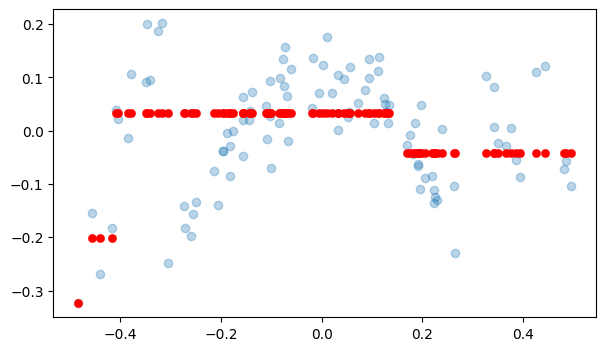

In [25]:
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(X, y2, alpha=0.3)
ax.scatter(X, tree_2.predict(X), color="red", lw=0.25);

# Ensemble Predictions

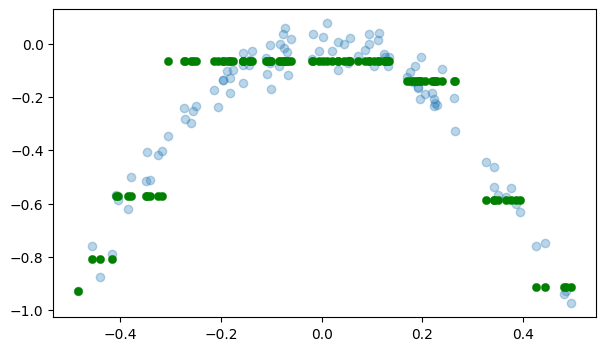

In [26]:
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(X, y, alpha=0.3)
ax.scatter(X, tree1.predict(X) + tree_2.predict(X), color="green", lw=0.25);

## Train a third DecisionTreeClassifier on the residual errors made by the sedond tree

In [27]:
y3 = y2 - tree_2.predict(X)
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=125)
tree_3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=125)

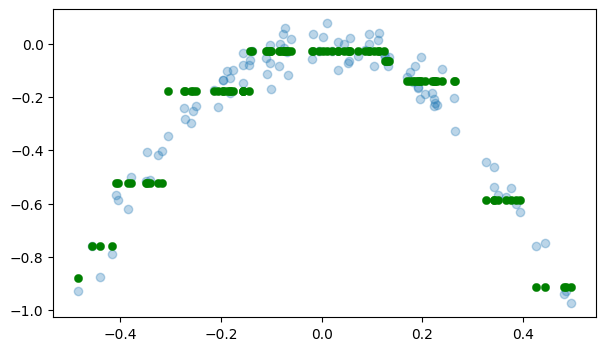

In [29]:
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(X, y, alpha=0.3)
ax.scatter(X, tree1.predict(X) + tree_2.predict(X) + tree_3.predict(X), color="green", lw=0.25);

We now have ensemble of 3 trees. To make predictions in a regression scenario we simply sum up the predictions of all trees. FOr more complicated problem we use Gradient Boosting Regressor or Classifier.

## Gradient Boosting


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=123)
gbrt.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=123)

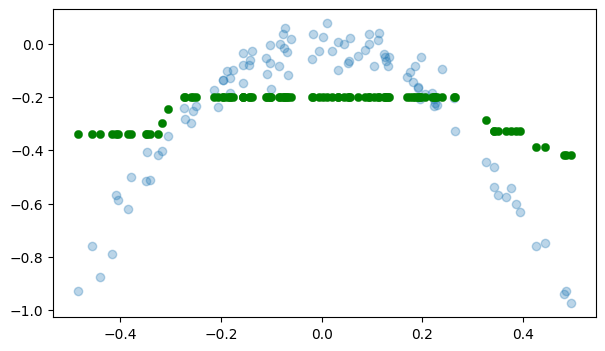

In [32]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(X, y, alpha=0.3)
ax.scatter(X, gbrt.predict(X), color="green", lw=0.25)

In [34]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.2, random_state=123)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=3,
                          random_state=123)

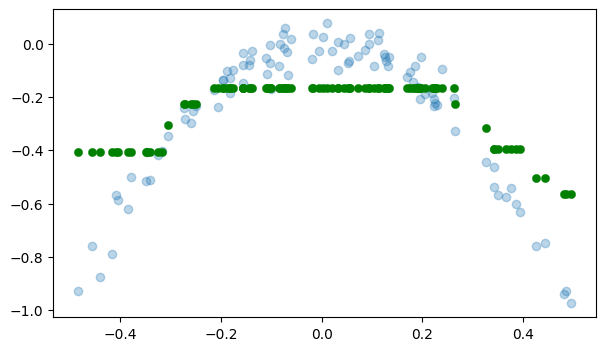

In [35]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(X, y, alpha=0.3)
ax.scatter(X, gbrt.predict(X), color="green", lw=0.25)

In [36]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.5, random_state=123)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, n_estimators=3,
                          random_state=123)

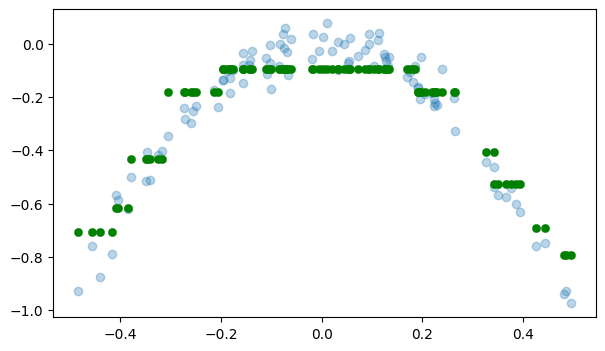

In [37]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(X, y, alpha=0.3)
ax.scatter(X, gbrt.predict(X), color="green", lw=0.25)

In [38]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=0.5, random_state=123)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, n_estimators=5,
                          random_state=123)

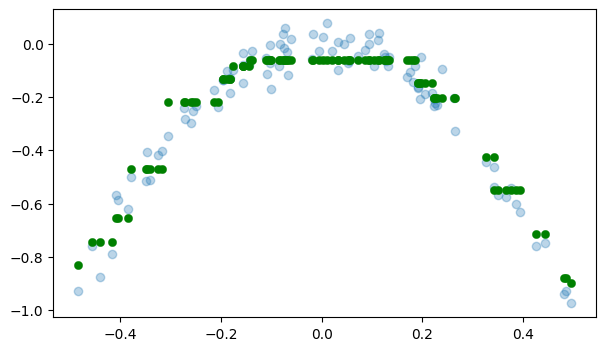

In [39]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(X, y, alpha=0.3)
ax.scatter(X, gbrt.predict(X), color="green", lw=0.25)

In [41]:
gbrt_best = GradientBoostingRegressor(max_depth=2,learning_rate=0.5, n_estimators=100, n_iter_no_change=5, tol=0.01, random_state=123)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, n_iter_no_change=5,
                          random_state=123, tol=0.01)

In [43]:
gbrt_best.n_estimators_

6

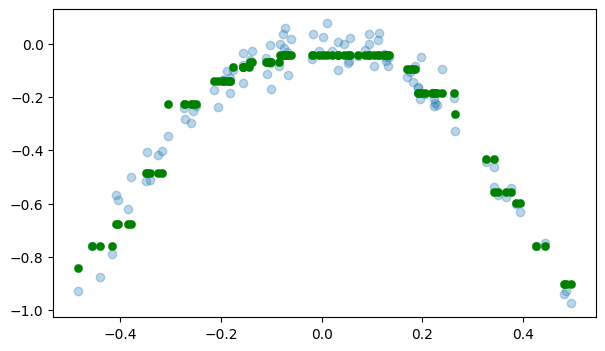

In [44]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(X, y, alpha=0.3)
ax.scatter(X, gbrt_best.predict(X), color="green", lw=0.25)